In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

In [6]:
df = pd.read_csv("wiki.csv")
df[['NumEdits']] = df[['NumEdits']].astype(int)
df.head()

,Editor,Article,NumEdits
0,Bob+Castle,Mr. Bean,444
1,Bob+Castle,Dad's Army,165
2,Bob+Castle,Old St Paul's Cathedral,161
3,Bob+Castle,Blackadder Goes Forth,105
4,Bob+Castle,One Foot in the Grave,98


In [7]:
df.shape

(10688975, 3)

## Plot the distribution of number of edited articles per editor. 

In [8]:
df_by_editor = df.groupby('Editor')
df_articles_per_editor = df_by_editor.size().to_frame(name="NumArticles")
df_articles_per_editor.head()

,NumArticles
Editor,
!Darkfire!6'28'14,100
!Silent,100
!VEZZO!+LL10,6
!carrot21!,1
!jackholeexplosion!,1


In [9]:
df_articles_per_editor.shape

(336289, 1)

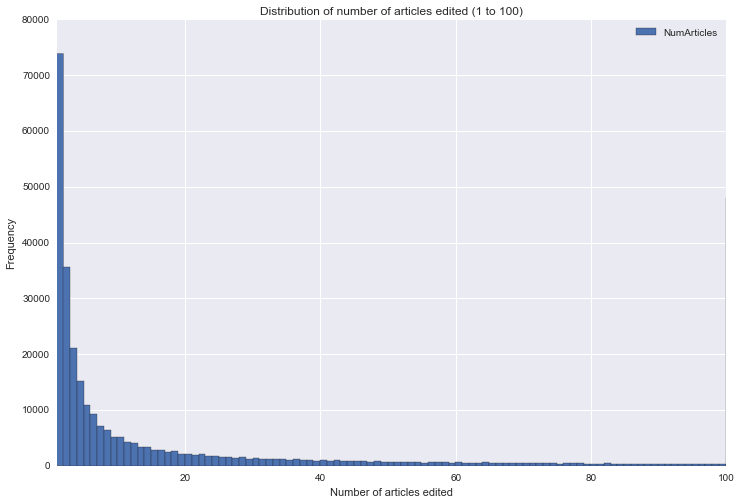

In [10]:
df_articles_per_editor.plot(kind='hist', bins=1000, figsize=(12,8))
plt.xlim(1,100)
plt.xlabel('Number of articles edited')
plt.title('Distribution of number of articles edited (1 to 100)')

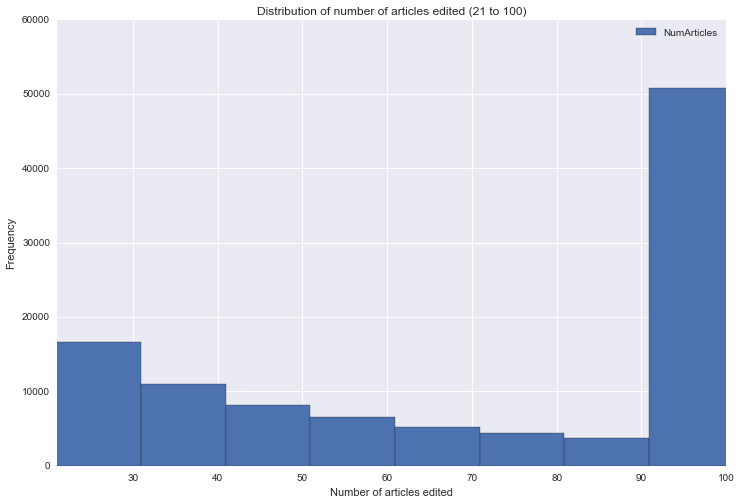

In [11]:
df_articles_per_editor.plot(kind='hist', bins=100, figsize=(12,8))
plt.xlim(21,100)
plt.ylim(0,60000)
plt.xlabel('Number of articles edited')
plt.title('Distribution of number of articles edited (21 to 100)')

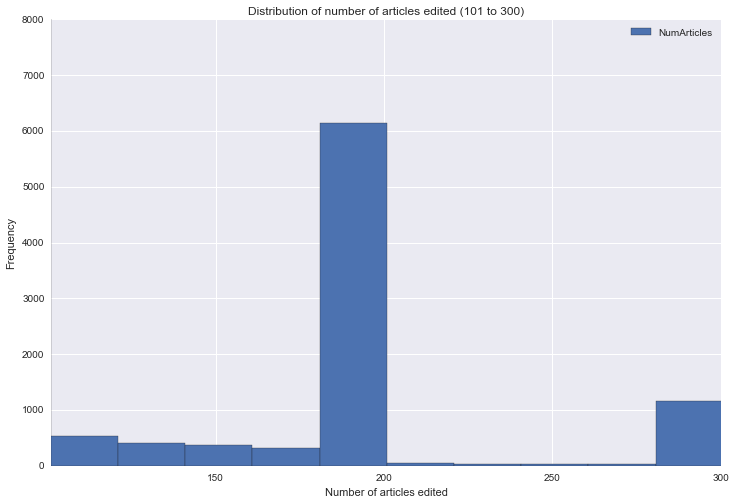

In [12]:
df_articles_per_editor.plot(kind='hist', bins=50, figsize=(12,8))
plt.xlim(101,300)
plt.ylim(0,8000)
plt.xlabel('Number of articles edited')
plt.title('Distribution of number of articles edited (101 to 300)')

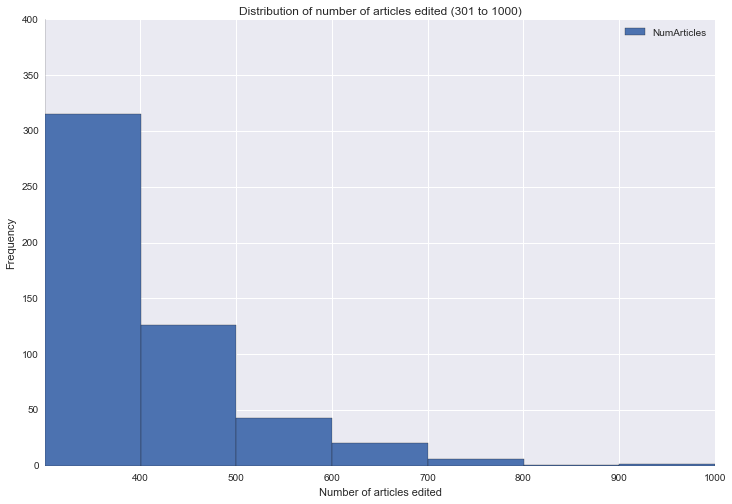

In [13]:
df_articles_per_editor.plot(kind='hist', bins=10, figsize=(12,8))
plt.xlim(301,1000)
plt.ylim(0,400)
plt.xlabel('Number of articles edited')
plt.title('Distribution of number of articles edited (301 to 1000)')

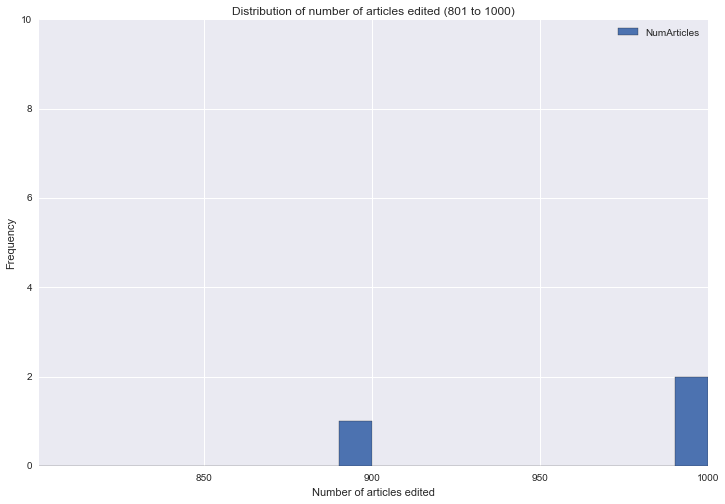

In [14]:
df_articles_per_editor.plot(kind='hist', bins=100, figsize=(12,8))
plt.xlim(801,1000)
plt.ylim(0,10)
plt.xlabel('Number of articles edited')
plt.title('Distribution of number of articles edited (801 to 1000)')

## Plot the distribution of total number of edits per editor.

In [16]:
df_edits_pivot_table = df.pivot_table(index=['Editor'], values=['NumEdits'], aggfunc=np.sum)
df_edits_pivot_table.head()

,NumEdits
Editor,
!Darkfire!6'28'14,192
!Silent,116
!VEZZO!+LL10,6
!carrot21!,1
!jackholeexplosion!,1


In [17]:
df_edits_pivot_table.shape

(336289, 1)

In [18]:
df_edits_pivot_table.max()

NumEdits    126120
dtype: int32

In [19]:
df_edits_filt = df_edits_pivot_table[df_edits_pivot_table.NumEdits <= 1000]
df_edits_filt.shape

(321714, 1)

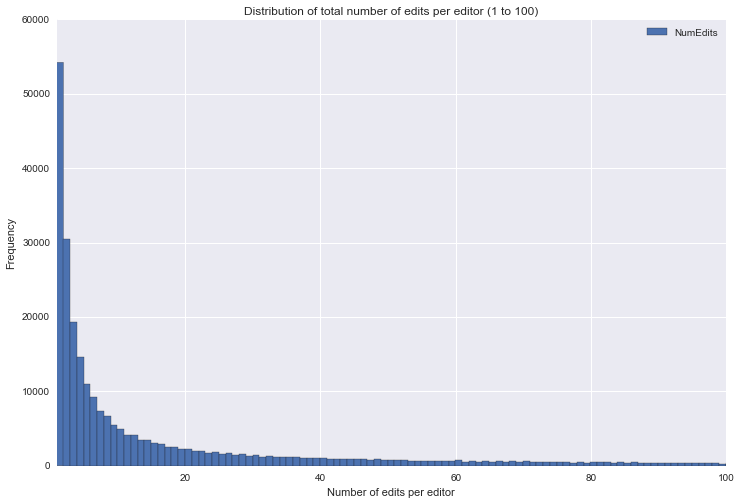

In [20]:
df_edits_filt.plot(kind='hist', bins=1000, figsize=(12,8))
plt.xlim(1,100)
plt.xlabel('Number of edits per editor')
plt.title('Distribution of total number of edits per editor (1 to 100)')

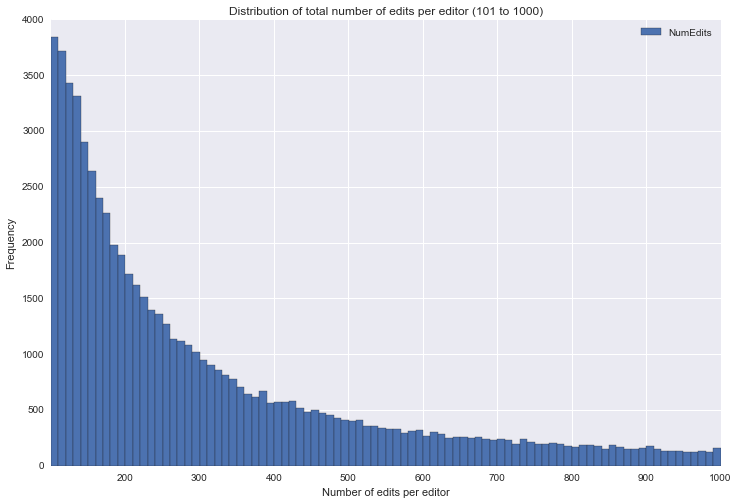

In [21]:
df_edits_filt.plot(kind='hist', bins=100, figsize=(12,8))
plt.xlim(101,1000)
plt.ylim(0,4000)
plt.xlabel('Number of edits per editor')
plt.title('Distribution of total number of edits per editor (101 to 1000)')

In [22]:
df_edits_mid = df_edits_pivot_table[(df_edits_pivot_table.NumEdits>1000) & (df_edits_pivot_table.NumEdits<=20000)]
df_edits_mid.shape

(14353, 1)

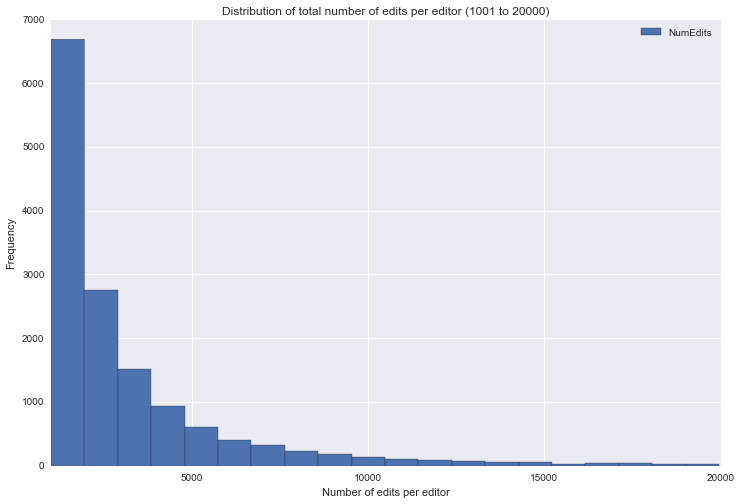

In [23]:
df_edits_mid.plot(kind='hist', bins=20, figsize=(12,8))
plt.ylim(0,7000)
plt.xlim(1001,20000)
plt.xlabel('Number of edits per editor')
plt.title('Distribution of total number of edits per editor (1001 to 20000)')

In [24]:
df_edits_high = df_edits_pivot_table[df_edits_pivot_table.NumEdits > 20000]
df_edits_high.shape

(222, 1)

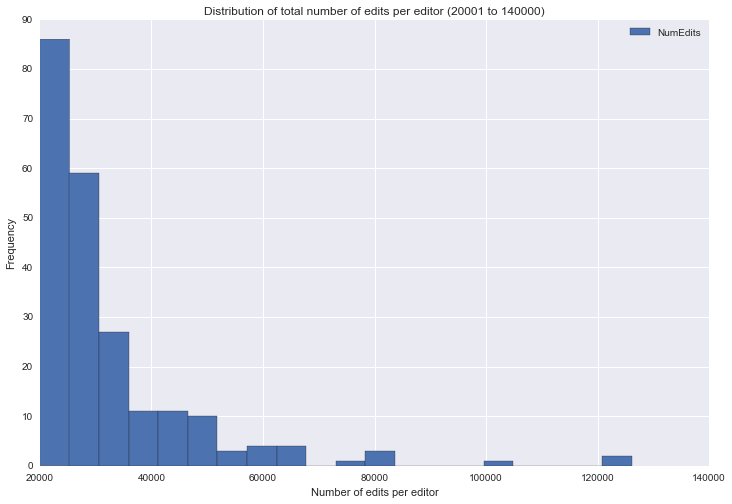

In [25]:
df_edits_high.plot(kind='hist', bins=20, figsize=(12,8))
plt.ylim(0,90)
plt.xlim(20001,140000)
plt.xlabel('Number of edits per editor')
plt.title('Distribution of total number of edits per editor (20001 to 140000)')

## Plot the distribution of total number of edits per article.

In [26]:
df_article_pivot_table = df.pivot_table(index=['Article'], values=['NumEdits'], aggfunc=np.sum)
df_article_pivot_table.head()

,NumEdits
Article,
! (album),4
! (disambiguation),22
!!,18
!!!,103
!!! (album),22


In [27]:
df_article_pivot_table.max()

NumEdits    27979
dtype: int32

In [28]:
df_article_pivot_table.shape

(1932779, 1)

In [29]:
df_article_low = df_article_pivot_table[df_article_pivot_table.NumEdits <= 100]
df_article_low.shape

(1790975, 1)

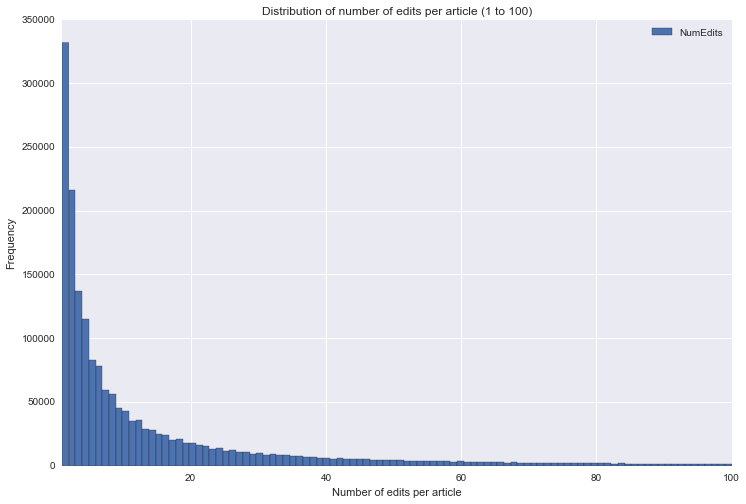

In [30]:
df_article_low.plot(kind='hist', bins=100, figsize=(12,8))
plt.xlim(1,100)
plt.xlabel('Number of edits per article')
plt.title('Distribution of number of edits per article (1 to 100)')

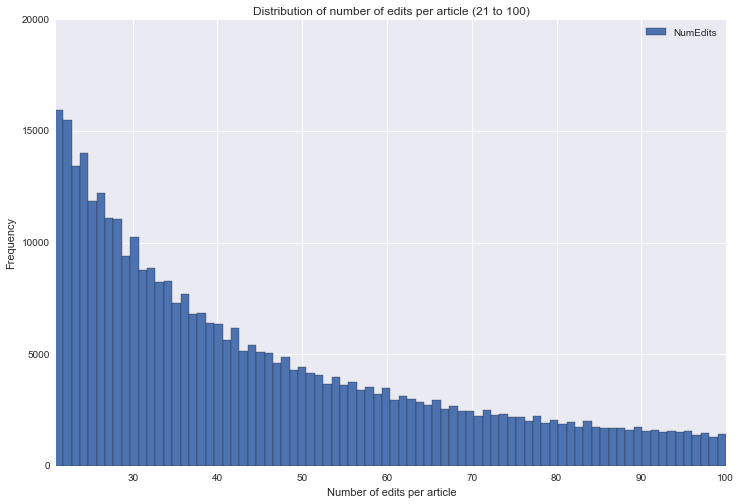

In [31]:
df_article_low.plot(kind='hist', bins=100, figsize=(12,8))
plt.xlim(21,100)
plt.ylim(0,20000)
plt.xlabel('Number of edits per article')
plt.title('Distribution of number of edits per article (21 to 100)')

In [32]:
df_article_mid = df_article_pivot_table[(df_article_pivot_table.NumEdits > 101) & (df_article_pivot_table.NumEdits <= 1000)]
df_article_mid.shape

(131466, 1)

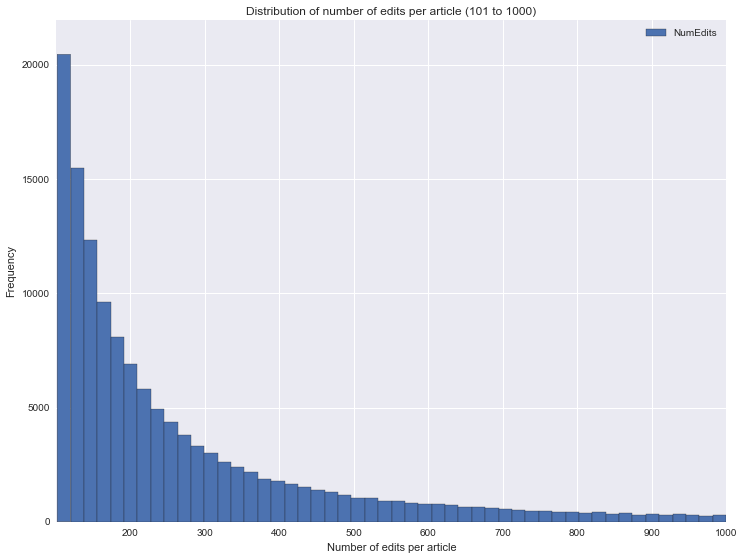

In [33]:
df_article_mid.plot(kind='hist', bins=50, figsize=(12,9))
plt.xlim(101,1000)
plt.ylim(0,22000)
plt.xlabel('Number of edits per article')
plt.title('Distribution of number of edits per article (101 to 1000)')

In [34]:
df_article_high = df_article_pivot_table[(df_article_pivot_table.NumEdits > 1001) & (df_article_pivot_table.NumEdits < 10000)]
df_article_high.shape

(9003, 1)

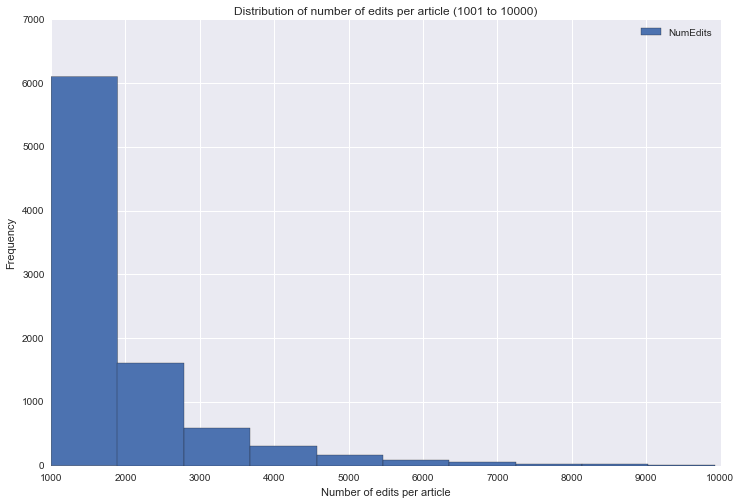

In [35]:
df_article_high.plot(kind='hist', figsize=(12,8))
plt.xlabel('Number of edits per article')
plt.title('Distribution of number of edits per article (1001 to 10000)')

In [36]:
df_article_highest =  df_article_pivot_table[(df_article_pivot_table.NumEdits > 10001)]
df_article_highest.shape

(32, 1)

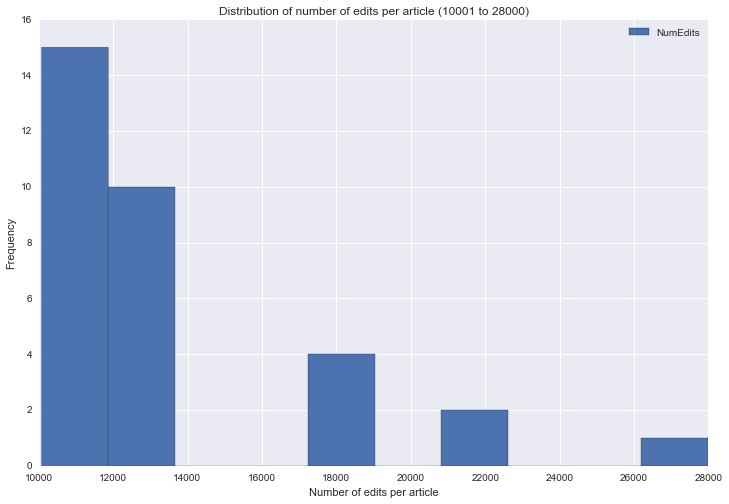

In [37]:
df_article_highest.plot(kind='hist', figsize=(12,8))
plt.xlabel('Number of edits per article')
plt.title('Distribution of number of edits per article (10001 to 28000)')

## Plot the distribution of number of editors per article.

In [38]:
df.head()

,Editor,Article,NumEdits
0,Bob+Castle,Mr. Bean,444
1,Bob+Castle,Dad's Army,165
2,Bob+Castle,Old St Paul's Cathedral,161
3,Bob+Castle,Blackadder Goes Forth,105
4,Bob+Castle,One Foot in the Grave,98


In [39]:
df_by_article = df.groupby('Article')
df_editors_per_article = df_by_article.size().to_frame(name='NumEditors')
df_editors_per_article.head()

,NumEditors
Article,
! (album),2
! (disambiguation),9
!!,10
!!!,29
!!! (album),11


In [40]:
df_editors_per_article.shape

(1932779, 1)

In [41]:
df_editors_per_article_low = df_editors_per_article[df_editors_per_article.NumEditors <= 20]
df_editors_per_article_low.shape

(1846634, 1)

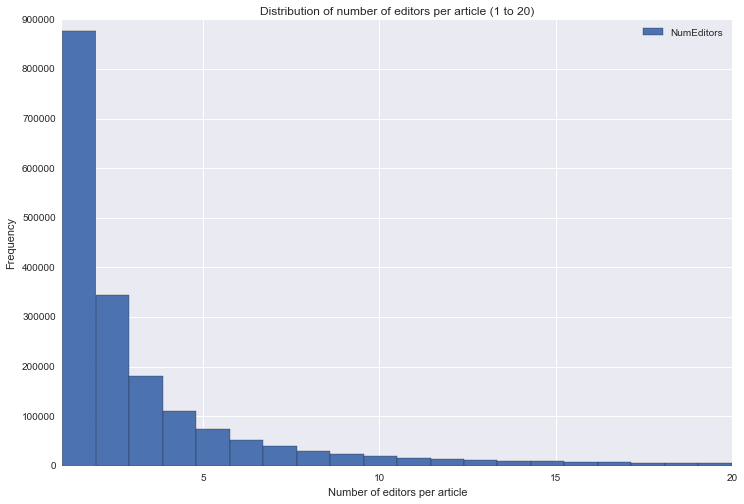

In [42]:
df_editors_per_article_low.plot(kind='hist', bins=20, figsize=(12,8))
plt.xlim(1,20)
plt.xlabel('Number of editors per article')
plt.title('Distribution of number of editors per article (1 to 20)')

In [43]:
df_editors_per_article_mid = df_editors_per_article[(df_editors_per_article.NumEditors>20) & (df_editors_per_article.NumEditors<=100)]
df_editors_per_article_mid.shape

(75746, 1)

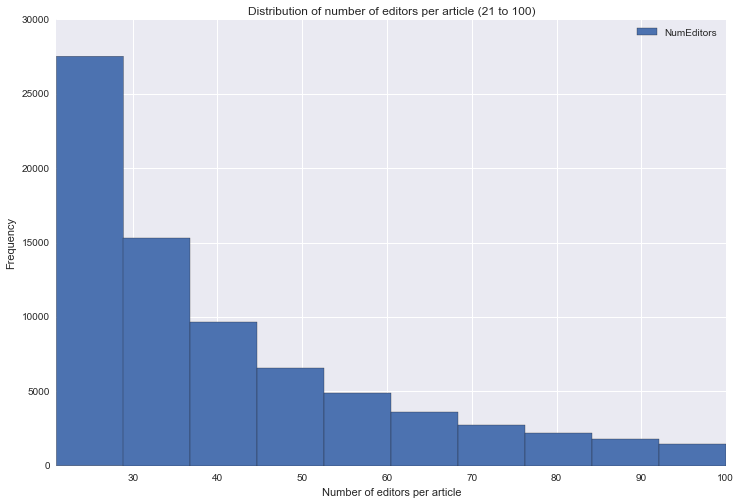

In [44]:
df_editors_per_article_mid.plot(kind='hist', figsize=(12,8))
plt.xlim(21,100)
plt.xlabel('Number of editors per article')
plt.title('Distribution of number of editors per article (21 to 100)')

In [45]:
df_editors_per_article_high = df_editors_per_article[(df_editors_per_article.NumEditors>100) & (df_editors_per_article.NumEditors<=1000)]
df_editors_per_article_high.shape

(10321, 1)

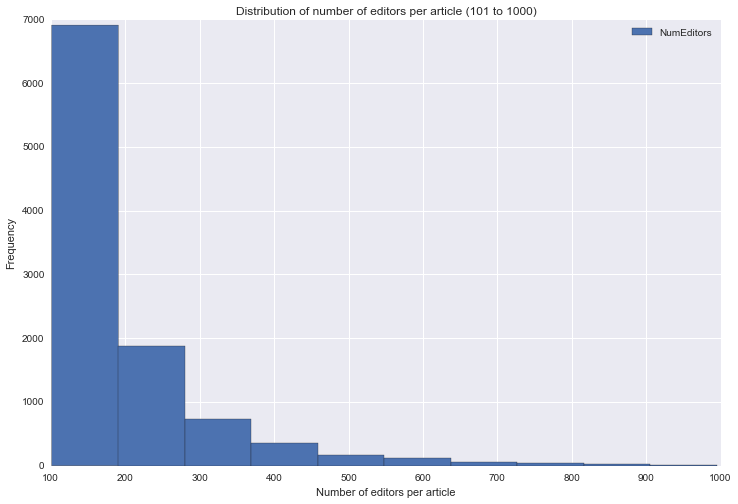

In [46]:
df_editors_per_article_high.plot(kind='hist', figsize=(12,8))
plt.xlabel('Number of editors per article')
plt.title('Distribution of number of editors per article (101 to 1000)')

In [47]:
df_editors_per_article_highest = df_editors_per_article[(df_editors_per_article.NumEditors>1000)]
df_editors_per_article_highest.shape

(78, 1)

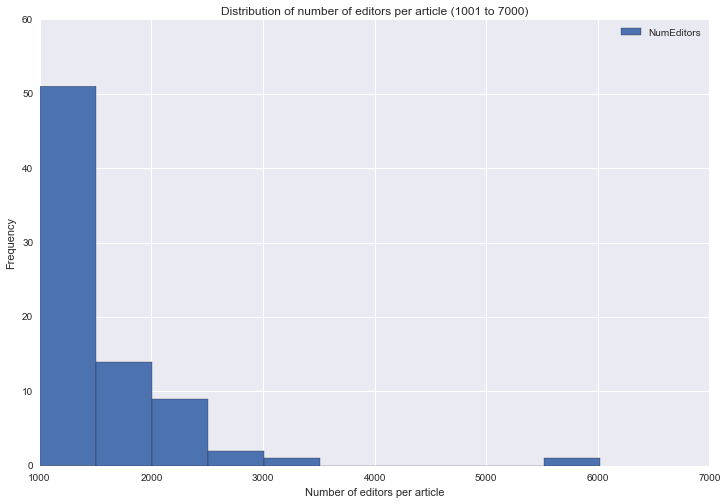

In [48]:
df_editors_per_article_highest.plot(kind='hist', figsize=(12,8))
plt.xlabel('Number of editors per article')
plt.title('Distribution of number of editors per article (1001 to 7000)')